In [1]:
import numpy as np
import pandas as pd
pd.options.mode.use_inf_as_na = True
from scipy.stats import ttest_ind
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
%config IPCompleter.greedy=True

In [2]:
#This is a csv of stats for a few of the NBA's traditional point guards, copied from www.basketball-reference.com
pg = pd.read_csv('PGS.csv')
pg.groupby('player')['ngame'].count().sort_values(ascending=False)

player
John Stockton    1504
Jason Kidd       1391
Steve Nash       1217
Isiah Thomas      979
Chris Paul        892
Name: ngame, dtype: int64

# Plotting 'Points Scored' four different ways.

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


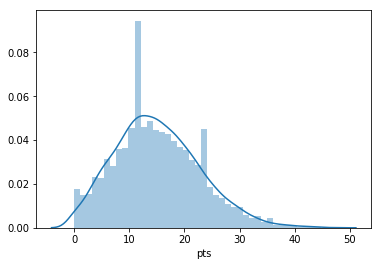

In [3]:
sns.distplot(pg['pts'])
plt.show()

#This is a basic hisogram, but the bin sizes may have strange cutoffs, which is misleading. I think it's unlikely that 
#12 points is as common as this is implying.

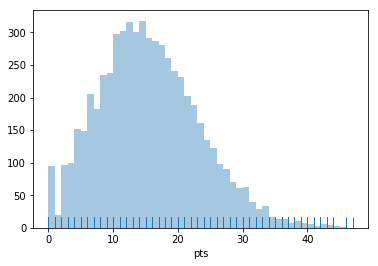

In [4]:
sns.distplot(pg.pts, kde=False, rug=True, bins=range(min(pg.pts), max(pg.pts)))
plt.show()
#With this histogram, we've set the bin count to size=1, as indicated by the rug below.
#That way we know that each discrete point level is represented fairly.
#Since the baseline basket is worth 2 points, and 1 point is only possible if you score only a Free Throw, that dip makes sense.

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


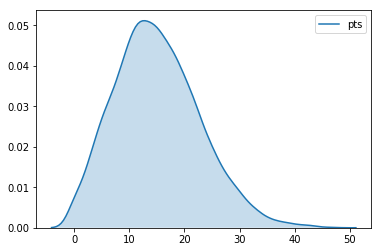

In [5]:
sns.kdeplot(pg.pts, shade=True)
plt.show()
#this is a more general look at the distribution shape and does not provide the granularity level. 

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


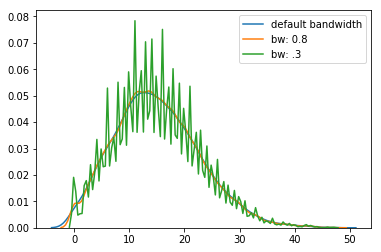

In [6]:
sns.kdeplot(pg.pts, label="default bandwidth")
sns.kdeplot(pg.pts, bw=.8, label="bw: 0.8")
sns.kdeplot(pg.pts, bw=.3, label="bw: .3")
plt.legend();
#forcing a tight bandwidth would normally show the noise, but in this case I believe the tightest line is actually being
#pulled down to zero in between each number, since points are discrete integers, not continuous. This is largely meaningless
#and not a good representation of this data.

# Choose two continuous variables, and plot them three different ways.

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


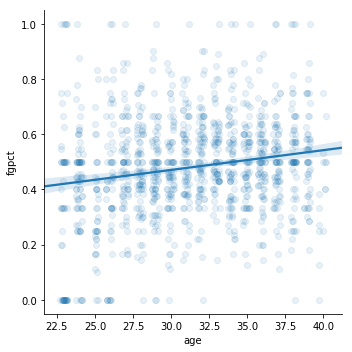

In [7]:
#Steve Nash's fgpct as he aged
snall = pd.DataFrame(pg.loc[pg.player == 'Steve Nash'])
sns.lmplot(x='age', y='fgpct', data=snall, scatter_kws={'alpha':0.1})

plt.show()
#A Simple trend line shows that as Steve Nash aged, his field goal efficiency increased. This makes sense as his 
#game was mostly based on a high IQ and not really on extreme athleticism or speed.

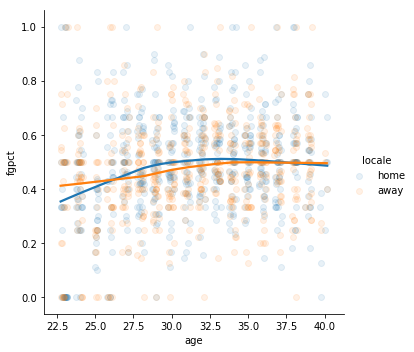

In [8]:
#Steve Nash's fgpct as he aged, home vs away
snall = pd.DataFrame(pg.loc[pg.player == 'Steve Nash'])
sns.lmplot(x='age', y='fgpct', hue='locale', data=snall, scatter_kws={'alpha':0.1}, lowess=True)

plt.show()
#These more local lines show that Steve's FG% did decline in old age after all. In the middle of his career, he performed
#more efficiently at his home stadium - this makes sense as the SSoL suns had an intense home court advantage. It's interesting
#that in his final years he was more efficient away from home - perhaps he had an extra mental edge as an old veteran... or maybe
#He just hated Staples Center.

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


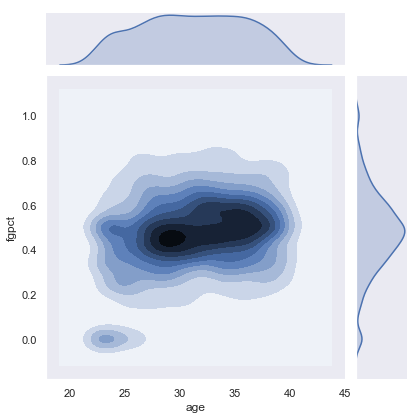

In [9]:
sns.set(style="dark")

sns.jointplot(x="age", y="fgpct", data=snall, kind="kde")
plt.show()
#This graph halps differentiate the early games in his career (where he scored 0 and didn't play much) with his real career 
#later on. Besides that it's not very helpful.

# Choose one continuous variable and one categorical variable, and plot them six different ways.

Assists & Player

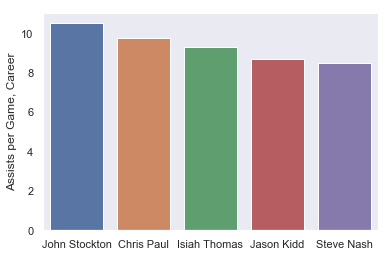

In [10]:
apg = pd.DataFrame({'astpg' : pg.groupby('player')['ast'].mean()}).reset_index()
apg.sort_values(by=['astpg'], inplace=True, ascending=False)
sns.barplot(x=apg.player, y=apg.astpg)
plt.xlabel('')
plt.ylabel('Assists per Game, Career')
plt.show()
#John Stockton was the clear APG leader.

In [11]:
js = pd.DataFrame(pg.loc[pg.player == 'John Stockton']['ast'].astype(int))
cp = pd.DataFrame(pg.loc[pg.player == 'Chris Paul']['ast'].astype(int))
it = pd.DataFrame(pg.loc[pg.player == 'Isiah Thomas'])
itna = pd.DataFrame(it.dropna(how='any')['ast'].astype(int))
jk = pd.DataFrame(pg.loc[pg.player == 'Jason Kidd']['ast'].astype(int))
sn = pd.DataFrame(pg.loc[pg.player == 'Steve Nash']['ast'].astype(int))

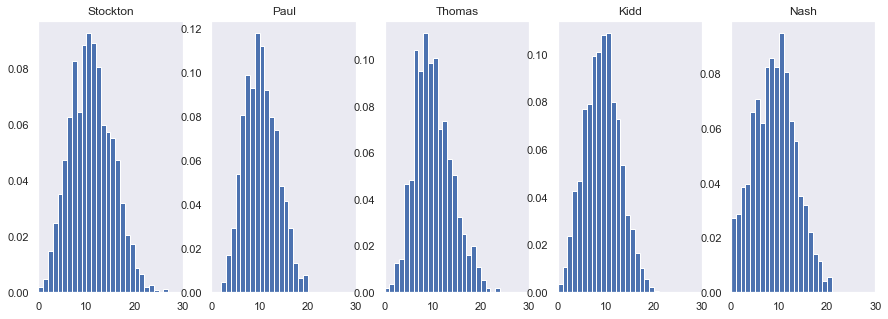

In [12]:
plt.figure(figsize=(15,5))


plt.subplot(1,5,1)
plt.hist(js.ast, density=True, bins=range(min(js.ast), max(js.ast)))
plt.title('Stockton')
plt.xlim(0,30)

plt.subplot(1,5,2)
plt.hist(cp.ast, density=True, bins=range(min(cp.ast), max(cp.ast)))
plt.title('Paul')
plt.xlim(0,30)

plt.subplot(1,5,3)
plt.hist(itna.ast, density=True, bins=range(min(itna.ast), max(itna.ast)))
plt.title('Thomas')
plt.xlim(0,30)

plt.subplot(1,5,4)
plt.hist(jk.ast, density=True, bins=range(min(jk.ast), max(jk.ast)))
plt.title('Kidd')
plt.xlim(0,30)

plt.subplot(1,5,5)
plt.hist(sn.ast, density=True, bins=range(min(sn.ast), max(sn.ast)))
plt.title('Nash')
plt.xlim(0,30)

plt.show()
#Stockton had a longer right tail than the others, and interestingly Nash had more zero assist games than anyone else.
#Insanely, Chris Paul has NEVER played in a game without earning an assist. He's also the only active player in this set,
#so perhaps as he ages he'll get some zeroes.

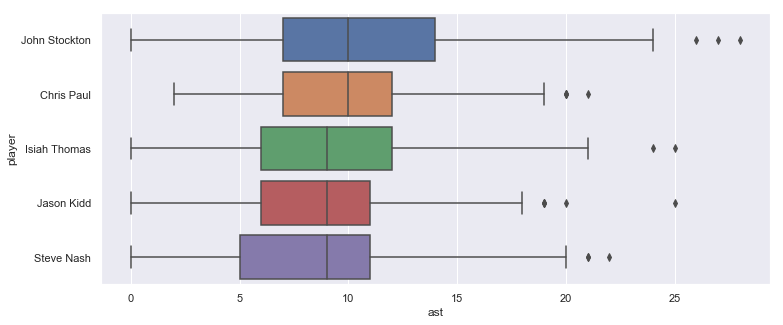

In [13]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,5))


ax = sns.boxplot(y='player', x='ast', data=pg, order=['John Stockton', 'Chris Paul', 'Isiah Thomas', 'Jason Kidd', 'Steve Nash'])

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


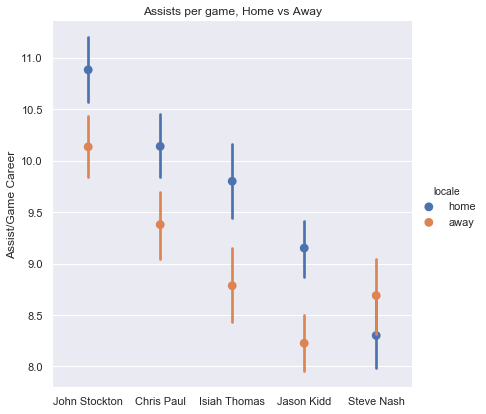

In [14]:
g = sns.catplot(x="player", y="ast", hue="locale", data=pg, height=6, kind="point", ci=95,join=False, 
                order=['John Stockton', 'Chris Paul', 'Isiah Thomas', 'Jason Kidd', 'Steve Nash'])

g.set_ylabels("Assist/Game Career")
g.set_xlabels("")
plt.title('Assists per game, Home vs Away')
plt.show()
#Extremely interesting - everyone gets more assist at home, except Nash! Assists are notoriously biased as the home team's 
#stat recorders have some control over what's considered an assist and what isn't. The idea that Nash averaged more on
#the road defies all expectations, though our confidence interval does barely overlap the means.

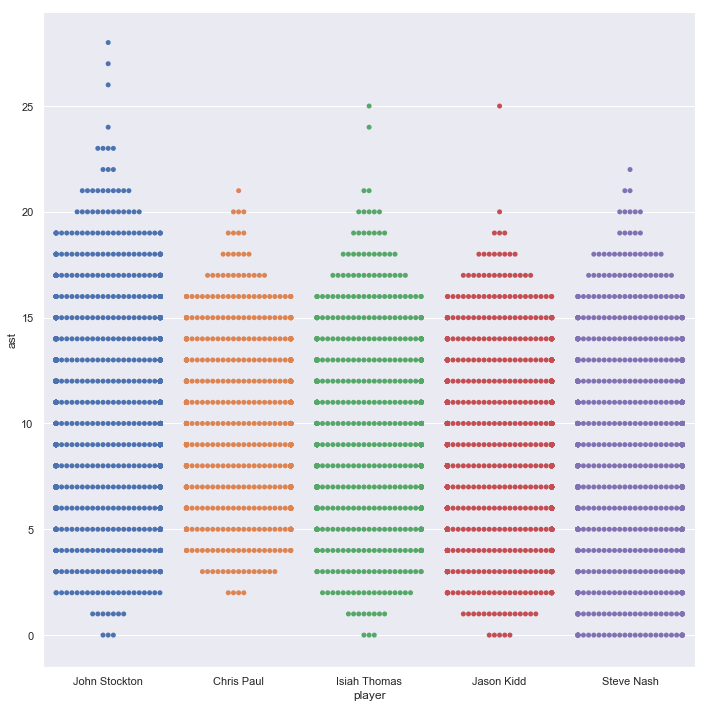

In [15]:
sns.catplot(x='player', y='ast', data=pg, height=10, kind='swarm',
           order=['John Stockton', 'Chris Paul', 'Isiah Thomas', 'Jason Kidd', 'Steve Nash'])
plt.show()

#Neat visual on their assist output. Again, showing that Chris Paul has a baseline of 3-5 assists on even his worst days

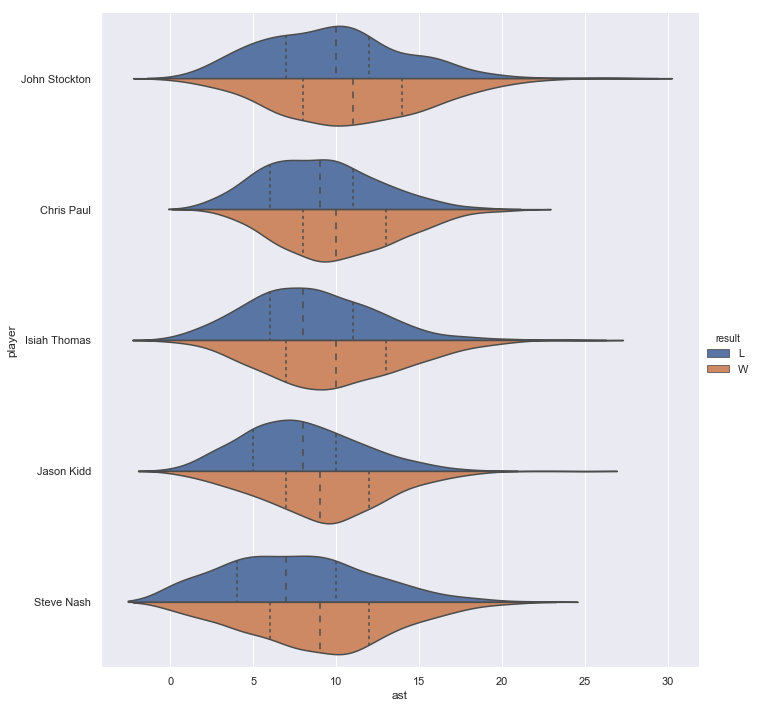

In [16]:
sns.catplot(x='ast', y='player', kind='violin', hue='result', split=True, data=pg, height=10, inner='quartile',
           order=['John Stockton', 'Chris Paul', 'Isiah Thomas', 'Jason Kidd', 'Steve Nash'])
plt.show()

#Interesting view of assist outputs in wins vs. losses. unsurprisingly, higher assist totals lead to wins across the board.

# As an optional challenge, find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:

* Probability distributions
* Bivariate relationships
* Whether the distributions or the relationships vary across groups

In [51]:
#Restrict the data to where all field goal attempt types are minimum of 5, to mostly eliminate the percent skewing that happens
#when a player only takes 1 or 2 shots
pgsub = pd.DataFrame(pg[(pg.fta >= 5) & (pg.att3p >=5) & (pg.att2p >=5)])


pg3 = pd.DataFrame(pgsub[['locale', 'age', 'pct2p', 'pct3p', 'ftpct']]).dropna(how='any')
pg3.shape


(323, 5)

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


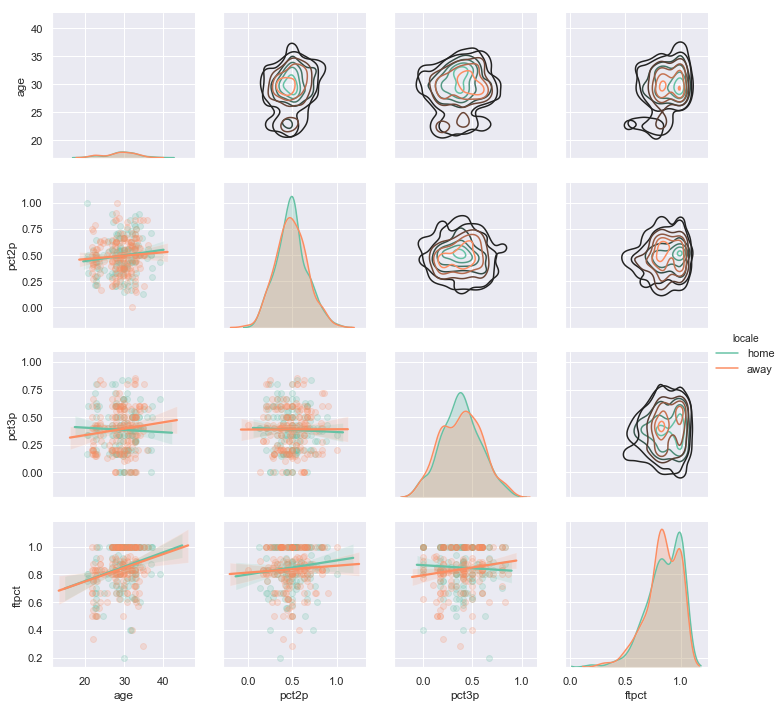

In [60]:
#g = sns.pairplot(pg3, hue='locale', palette='Set2')
#g.add_legend()
#plt.show()


g = sns.PairGrid(pg3, hue='locale', palette='Set2')
g.map_lower(sns.regplot, scatter_kws={'alpha':0.2})
g.map_upper(sns.kdeplot, n_levels=5)
g.map_diag(sns.kdeplot, shade=True)
g.add_legend()
plt.show()

The lower left triangle show the lines of best fit for various relationships between age, 2-pointer %, 3-pointer %, and free throw % in games with a high volume of shot attempts (at least 5 of each type). In general, age is slightly positively correlated with higher percentages, but the confidence intervals are not wide. Similarly, shooting a higher percentage on one type of shot doesn't necessarily mean you'll shoot better on the others.

The upper right triangle attempts to show the relationships another way by showing where the values cluster. The categorical overlay makes this difficult.

the diagonal show the distribution of each variable:
* Age blips slightly in the middle, which makes sense: early in their career they won't make it into as many games due to inexperience, and later in their career they'll play less due to rest and injury.
* 2pt% is a normal distribution mainly because the # of attempts for 2pters is higher, so your samples for each % are more robust. Additionally, it peaks around 50%, which is very high, but appropriate for these all-time great point guards.
* 3pt% is approximately a normal distribution, though it's not perfect. I suspect that's because nba players (at that time) took less 3 pointers per game, so the sample size for each % calculation is small and prone to skewing.
* Finally, free throw % peaks very close to 100%, because these 5 are all-time great shooters, but notably, the peak for away games is lower than the peak for home games, which indicates the ability of fans to change the outcome of free throws.